In [1]:
import pymecht as pmt
from matplotlib import pyplot as plt
import numpy as np

We start by creating two uniaxial samples with different material properties and different **reference length**, one with `L0=20` and second with `L0=22`. We also set the fiber direction to the first axis for both.

In [2]:
mat1 = pmt.MatModel('nh','goh')
strip_1 = pmt.UniaxialExtension(mat1,disp_measure='length', force_measure='force')
pmt.specify_single_fiber(strip_1)
params = strip_1.parameters
params.set('mu_0',22.57)
params.set('k1_1',276.45)
params.set('k2_1',42.85)
params.set('k3_1',0.246)
params.set('L0',20)
strip_1.parameters = params

mat2 = pmt.MatModel('nh','goh')
strip_2 = pmt.UniaxialExtension(mat2,disp_measure='length', force_measure='force')
pmt.specify_single_fiber(strip_2)
params = strip_2.parameters
params.set('mu_0',14.30)
params.set('k1_1',290.22)
params.set('k2_1',4.87)
params.set('k3_1',0.224)
params.set('L0',22)
strip_2.parameters = params

Fiber directions set to  0  degrees ( 0.0  radians)
Fiber directions set to  0  degrees ( 0.0  radians)


Next, we combine them using `LayeredUniaxial` and check its parameters. We notice that all the parameters for the first "layer" have `_layer0` appended to their names, and those for second layer have `_layer1` appended, etc.

In [3]:
combined = pmt.LayeredUniaxial(strip_1,strip_2)
print(combined.parameters)

------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
L0_layer0         20.00       No          1.00e-04    1.00e+03    
A0_layer0         1.00        No          1.00e-04    1.00e+03    
mu_0_layer0       22.57       No          1.00e-04    1.00e+02    
k1_1_layer0       2.76e+02    No          0.10        30.00       
k2_1_layer0       42.85       No          0.10        30.00       
k3_1_layer0       0.25        No          0.00        0.33        
L0_layer1         22.00       No          1.00e-04    1.00e+03    
A0_layer1         1.00        No          1.00e-04    1.00e+03    
mu_0_layer1       14.30       No          1.00e-04    1.00e+02    
k1_1_layer1       2.90e+02    No          0.10        30.00       
k2_1_layer1       4.87        No          0.10        30.00       
k3_1_layer1       0.22        No          0.00        0.33    

We impose a deformed length varying between 20 and 25 and calculate and plot the resulting force.

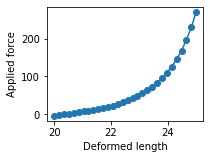

In [4]:
def_length = np.linspace(20,25,30)
force = combined.disp_controlled(def_length)

fig,ax = plt.subplots(1,1,figsize=(4*0.7,3*0.7))
ax.plot(def_length,force,'-o')
ax.set_xlabel('Deformed length')
ax.set_ylabel('Applied force')
plt.show()

Moreover, we calculate the "free" length of the layered structure by applied a zero force and find that it is somewhere between the lengths of the two layers. 

In [5]:
free_length = combined.force_controlled(0,x0=20)
print('Length without applied force is', free_length)

Length without applied force is 20.43300896426766


## Warning about `disp_measure` and `force_measure`

For the `LayeredUniaxial` to work correctly, we need the component layers to have lengths as their `disp_measure` and force as their `force_measure`. Lengths are required to remove ambiguity about what is the stretch/strain etc. is with respect to (i.e., is it the length of the first layer or the second layer?). The force is required, since the forces generated by the component layers will add up, while stresses do not. 

If we do not follow these rules, warning will be raised as shown below.

In [6]:
strip_1 = pmt.UniaxialExtension(mat1, force_measure='cauchy')
strip_2 = pmt.UniaxialExtension(mat2, force_measure='cauchy')
combined = pmt.LayeredUniaxial(strip_1,strip_2)

/usr/local/lib/python3.9/site-packages/pymecht/SampleExperiment.py:909: UserWarning: The output of the LayeredUniaxial should be force, as stresses are not additive. The results may be spurious
  warnings.warn("The output of the LayeredUniaxial should be force, as stresses are not additive. The results may be spurious")
